In [1]:
# Goal: Create 8 - 20 Clusters which represent the architypical member behaviour. 
# Within those Clusters we will look to Understand how they are Changing Over Time, with the goal of identify how are attempts to 
# Engage and Support those members change their behaviour overtime.
# Explanation will look to Explain the Clusters, based on Behaviour.
# We will look to understand how those Cluster Are Distributed across Descriptive Variables Age, Duration, Demographic Location

# Approach: we will look to start Simple, create a base line, explore how different variables impact the creation of the cluster
# Need to Explain Every Variable in the Model. What it does and how it does it

In [2]:

# Randomly Test the Change of Income. If No Change to Income, then Randomly Distribute everything 
# When Classifyign Members think of them as Current State .Change State and combined. Mathetmatically someone c
# Changing at a similar level but from a different class might not look the same.

# Create New Members

change_parameters = ['income','kids','move','purchase_house','retirement_savings','unexpected_event',
                     'negative_beem_experience',]
                     
# Infer Probabilitistically
# Machine Learning
# What you are Model. Behavioural Similiarity
# Who Looks Similiar
# Who is more Likely to Grow
# Who is more likely to grow Faster.
# Who is more likely to perform better.

# Where can we expect to grow.

# Looking at 2 Groups, it can be easy to identify which group is more protitable, but it can be more difficult to identify our
# Right to win Segment.

In [3]:
import pandas as pd
import numpy as np
import datetime

import sys
sys.path.append("/Users/derekdewald/Documents/Python/Github_Repo/d_py_functions")

from synthetic_mbr2 import make_kmeans_pipeline, create_clustering_visualization,sample_score_silhouette,scatter_from_dataframe,iteratively_test_sampled_model_performance,feature_importance_by_clusters,mutual_information_per_feature
from synthetic_mbr import generate_synthetic_dataset, flatten_clean_dict,time_series_statistics

final_mbr_df, final_txn_df = generate_synthetic_dataset()


In [4]:
final_mbr_df

,MEMBERNBR,STATUS,BRANCHNAME,CITY,CLASSIFICATION,AGE,LIQUID_ASSETS,PRIMARY_IS_BEEM,KIDS,HOME_OWNER,...,DEPOSIT_GROWTH,LOAN_GROWTH,INCOME_GROWTH,TXN_GROWTH,DEPOSIT_IMPACT,LOAN_IMPACT,INCOME_IMPACT,TXN_IMPACT,RANDOM_CLOSE,HEALTH_CLOSE
0,1,Active,BRANCHNAME 1,Surrey,FIXED_INCOME_SENIOR,71.20,54074.06,0,0.70,1,...,0.989295,0.989295,1.0,0.989295,0.0,0.0,0.0,0.0,NaN,NaN
1,2,Active,BRANCHNAME 1,Surrey,RETIREMENT_READY,61.12,567019.30,1,0.38,0,...,0.989295,0.989295,1.0,0.989295,0.0,0.0,0.0,0.0,NaN,NaN
2,3,Active,BRANCHNAME 1,Surrey,RETIREMENT_READY,59.89,1242510.27,1,0.66,1,...,0.989295,0.989295,1.0,0.989295,0.0,0.0,0.0,0.0,NaN,NaN
3,4,Active,BRANCHNAME 1,Surrey,PAYCHECK_TO_PAYCHECK,51.92,1638.72,1,0.14,0,...,0.989295,0.989295,1.0,0.989295,0.0,0.0,0.0,0.0,NaN,NaN
4,5,Active,BRANCHNAME 1,Surrey,FIXED_INCOME_SENIOR,84.55,27879.35,0,0.49,0,...,0.989295,0.989295,1.0,0.989295,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164523,164524,Active,BRANCHNAME 40,Kelowna,RETIREMENT_READY,59.70,1467677.22,0,0.97,1,...,1.027539,1.027539,1.0,1.027539,0.0,0.0,0.0,0.0,0.0,0.0
164524,164525,Active,BRANCHNAME 40,Kelowna,RETIREMENT_READY,75.58,1353598.77,1,0.11,1,...,1.027539,1.027539,1.0,1.027539,0.0,0.0,0.0,0.0,0.0,0.0
164525,164526,Active,BRANCHNAME 40,Kelowna,FIXED_INCOME_SENIOR,83.58,17433.52,1,0.13,1,...,1.027539,1.027539,1.0,1.027539,0.0,0.0,0.0,0.0,0.0,0.0
164526,164527,Active,BRANCHNAME 40,Kelowna,RETIREMENT_READY,67.38,869537.25,0,0.33,1,...,1.027539,1.027539,1.0,1.027539,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
final_txn_df

,MEMBERNBR,variable,value,MONTH
0,2,TV_INTERNET,96.738608,2024-01-30
1,3,TV_INTERNET,111.368845,2024-01-30
2,4,TV_INTERNET,71.431092,2024-01-30
3,7,TV_INTERNET,70.714105,2024-01-30
4,8,TV_INTERNET,323.308570,2024-01-30
...,...,...,...,...
606371,164518,OTHER,1003.057812,2025-07-28
606372,164519,OTHER,1625.577822,2025-07-28
606373,164523,OTHER,3532.284535,2025-07-28
606374,164525,OTHER,1302.668985,2025-07-28


In [6]:

centroid_clustering_model = {
    'BILL_PAY_DEBIT':{
        'Business Definition':'Monthly Total of Member Bill Payments',
        'Inclusion Rationale':"",
        'Semantic Classification':"State",
        'Functional Classification':"Core",
        'IMPUTE':'Zero',
        'SCALE':1,
    },
    'POS_TXN_DEBIT':{
        'Business Definition':'Monthly Total of Member POS Activity',
        'Inclusion Rationale':"",
        'Semantic Classification':"State",
        'Functional Classification':"Core",
        'IMPUTE':'Zero',
        'SCALE':1,
    },
    'INVESTMENT_DEBIT':{
        'Business Definition':'Monthly Total of Member Third Party Investment Activity',
        'Inclusion Rationale':"",
        'Semantic Classification':"State",
        'Functional Classification':"Core",
        'IMPUTE':'Zero',
        'SCALE':1,
    },
    'PAYROLL_DEPOSIT':{
        'Business Definition':'Monthly Total of Payroll deposit into account',
        'Inclusion Rationale':"",
        'Semantic Classification':"State",
        'Functional Classification':"Core",
        'IMPUTE':'Zero',
        'SCALE':1,
    },
    'OTHER_DEPOSIT':{
        'Business Definition':'All other Deposits into Account',
        'Inclusion Rationale':"",
        'Semantic Classification':"State",
        'Functional Classification':"Core",
        'IMPUTE':'Zero',
        'SCALE':1,
    },
    'MORTGAGE_BALANCE':{
        'Business Definition':'Total Mortgage Balance Outstanding',
        'Inclusion Rationale':"",
        'Semantic Classification':"State",
        'Functional Classification':"Core",
        'IMPUTE':'Zero',
        'SCALE':1,
    },
     'DEPOSIT_BALANCE':{
        'Business Definition':'Total Deposit Balance Held',
        'Inclusion Rationale':"",
        'Semantic Classification':"State",
        'Functional Classification':"Core",
        'IMPUTE':'Zero',
        'SCALE':1,
    }
}

cc_model_base_columns = list(centroid_clustering_model.keys())
primary_key = 'MEMBERNBR'

# Pick only the Last Month of the Data. Will Add historical activity values to it.
current_date = sorted(list(final_mbr_df['MONTH'].unique()))[-1]
current_df = final_mbr_df[final_mbr_df['MONTH']==current_date].copy()
cc_model_df = current_df.set_index(primary_key)[cc_model_base_columns].copy()

# Iterate Through DataSet, creating Historical Activity Values as needed
for col in cc_model_base_columns:
    
    # Create TimeSeries Data For Column
    temp_ts = final_mbr_df.pivot_table(index='MEMBERNBR',columns=['MONTH'],values=col)
    
    # Calculate Statistics as Desired
    temp_df =time_series_statistics(df=temp_ts,calculuation_periods=[1,3,6,12])
    
    # Determine Statistics I want to keep for Model
    keep_ = ['AVG_3M','AVG_6M','AVG_12M','CHG_DF','AVG_DF']
    
    # Add Variable to Dictionary
    for calc_ in keep_:
        temp_var = f"{calc_}_{col}"
        bd = f"{calc_} {centroid_clustering_model[col]['Business Definition']}"

        if calc_ in ['AVG_3M','AVG_6M','AVG_12M']:    
            centroid_clustering_model[temp_var] = {
                'Business Definition':bd,
                'Inclusion Rationale':"",
                'Semantic Classification':"Baseline",
                'Functional Classification':"Core",
                'IMPUTE':'Zero',
                'SCALE':1,
            }
        elif calc_ in ['AVG_DF']:
            centroid_clustering_model[temp_var] = {
                'Business Definition':bd,
                'Inclusion Rationale':"",
                'Semantic Classification':"Baseline",
                'Functional Classification':"Descriptive",
                'IMPUTE':'Zero',
                'SCALE':1,
        }
        else:
            centroid_clustering_model[temp_var] = {
                'Business Definition':bd,
                'Inclusion Rationale':"",
                'Semantic Classification':"Momentum",
                'Functional Classification':"Descriptive",
                'IMPUTE':'Zero',
                'SCALE':1,
        }
    # Rename Selected Column in DataFrame
    temp_df1 = temp_df[keep_].rename(columns={x:f'{x}_{col}' for x in keep_}).reset_index()
    
    # Merge Into Final Output DataFrame
    cc_model_df = cc_model_df.merge(temp_df1,on='MEMBERNBR',how='left')
    
data_dictionary_df = flatten_clean_dict(centroid_clustering_model,index_name='METRIC_NAME',high_low_list_fix=True)

In [17]:
import os
os.getcwd()

'/Users/derekdewald/Documents/Python/Github_Repo/JupyterNotebooks'

In [7]:
cc_model_df.head()

,MEMBERNBR,BILL_PAY_DEBIT,POS_TXN_DEBIT,INVESTMENT_DEBIT,PAYROLL_DEPOSIT,OTHER_DEPOSIT,MORTGAGE_BALANCE,DEPOSIT_BALANCE,AVG_3M_BILL_PAY_DEBIT,AVG_6M_BILL_PAY_DEBIT,...,AVG_3M_MORTGAGE_BALANCE,AVG_6M_MORTGAGE_BALANCE,AVG_12M_MORTGAGE_BALANCE,CHG_DF_MORTGAGE_BALANCE,AVG_DF_MORTGAGE_BALANCE,AVG_3M_DEPOSIT_BALANCE,AVG_6M_DEPOSIT_BALANCE,AVG_12M_DEPOSIT_BALANCE,CHG_DF_DEPOSIT_BALANCE,AVG_DF_DEPOSIT_BALANCE
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00
1,2,986.39,1700.14,1477.78,4925.04,862.63,0.00,467156.83,997.10,1013.46,...,0.00,0.00,0.00,0.00,0.00,472230.07,479978.18,495987.08,-99862.47,5.155664e+05
2,3,904.00,1347.82,2086.73,5457.87,1878.00,429943.71,1023681.51,913.82,928.81,...,434612.83,441743.73,456477.38,-91907.55,474497.04,1034798.52,1051776.96,1086857.27,-218828.76,1.129761e+06
3,4,442.83,1465.16,61.45,2959.28,100.79,0.00,1350.11,447.64,454.98,...,0.00,0.00,0.00,0.00,0.00,1364.77,1387.17,1433.44,-288.61,1.490021e+03
4,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00


In [16]:
data_dictionary_df.to_excel('model_dict.xlsx',index=False)

In [14]:
data_dictionary_df.head()


,METRIC_NAME,Business Definition,Inclusion Rationale,Semantic Classification,Functional Classification,IMPUTE,SCALE
0,BILL_PAY_DEBIT,Monthly Total of Member Bill Payments,,State,Core,Zero,1
1,POS_TXN_DEBIT,Monthly Total of Member POS Activity,,State,Core,Zero,1
2,INVESTMENT_DEBIT,Monthly Total of Member Third Party Investment...,,State,Core,Zero,1
3,PAYROLL_DEPOSIT,Monthly Total of Payroll deposit into account,,State,Core,Zero,1
4,OTHER_DEPOSIT,All other Deposits into Account,,State,Core,Zero,1


In [9]:
def model_semantic_structure(df,primary_key=['Semantic Classification','Functional Classification']):
    
    temp_df = df[primary_key].copy()
    temp_df['Count']=1
    
    return temp_df.groupby(primary_key).sum().reset_index()
    
model_semantic_structure(data_dictionary_df)
    

,Semantic Classification,Functional Classification,Count
0,Baseline,Core,21
1,Baseline,Descriptive,7
2,Momentum,Descriptive,7
3,State,Core,7


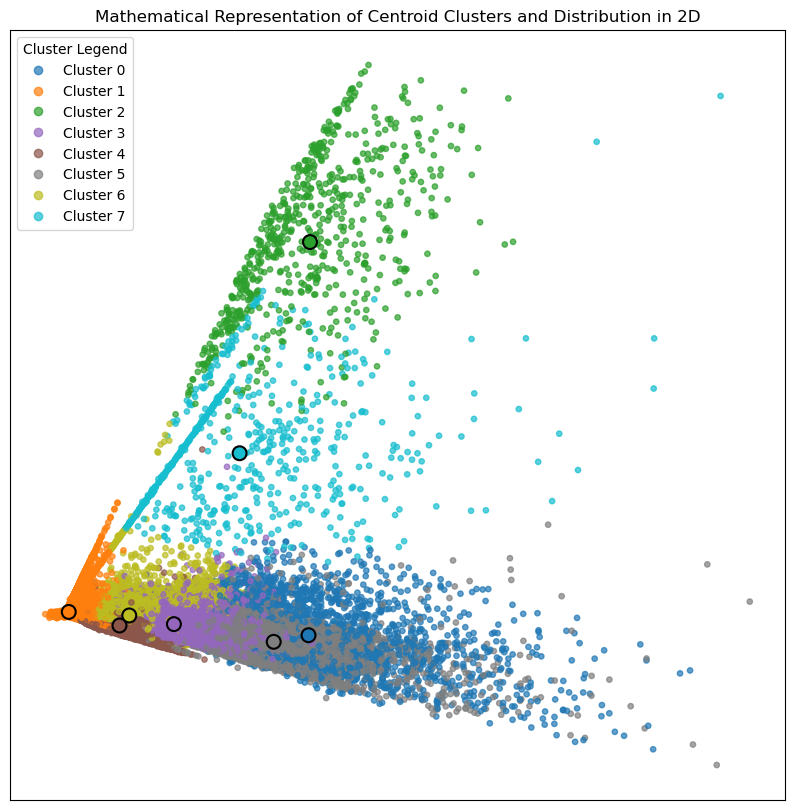

In [10]:
X = cc_model_df.drop(['MEMBERNBR'],axis=1).copy()
pipe, audit, final_df, Xt,scaled = make_kmeans_pipeline(X,data_dictionary_df,'METRIC_NAME')

labels = pipe.named_steps['kmeans'].labels_
centers = pipe.named_steps['kmeans'].cluster_centers_

create_clustering_visualization(Xt,pipe)

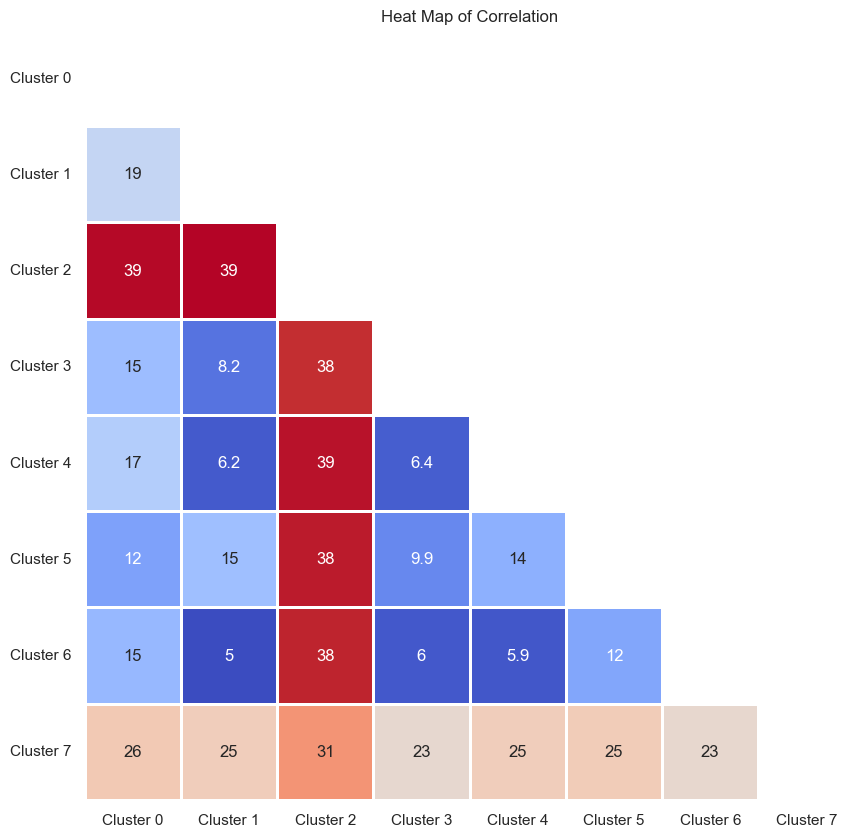

In [12]:

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist, pdist, squareform
import seaborn as sns
from visualization import Heatmap

Xt_dense = Xt if isinstance(Xt, np.ndarray) else np.asarray(Xt)

# Centroid pairwise distances (Euclidean)
centers = pipe.named_steps['kmeans'].cluster_centers_
centroid_dists = squareform(pdist(centers, metric='euclidean'))
centroid_dists_df = pd.DataFrame(centroid_dists, 
                                 index=[f"Cluster {i}" for i in range(centers.shape[0])],
                                 columns=[f"Cluster {i}" for i in range(centers.shape[0])])

Heatmap(centroid_dists_df,cbar=False,y_rotate=90,correlation=False,set_center='')

###################################################################################################################

# Do I actually Understand what these Distances MEAN. No. See if its eventually answered. 


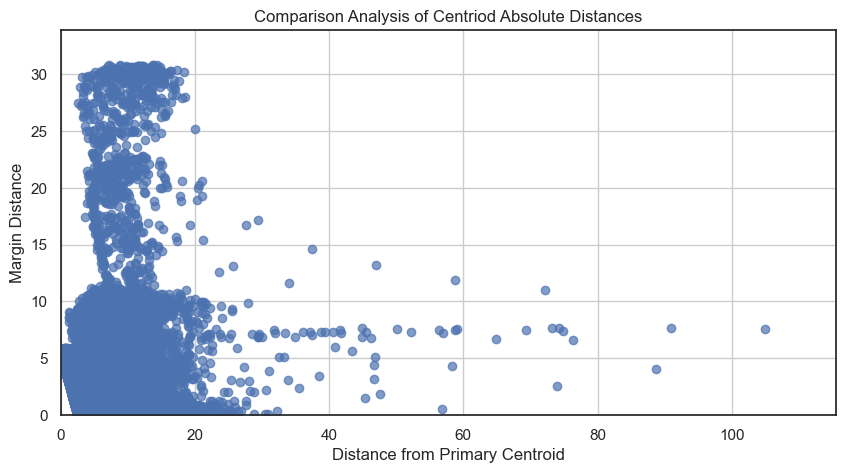

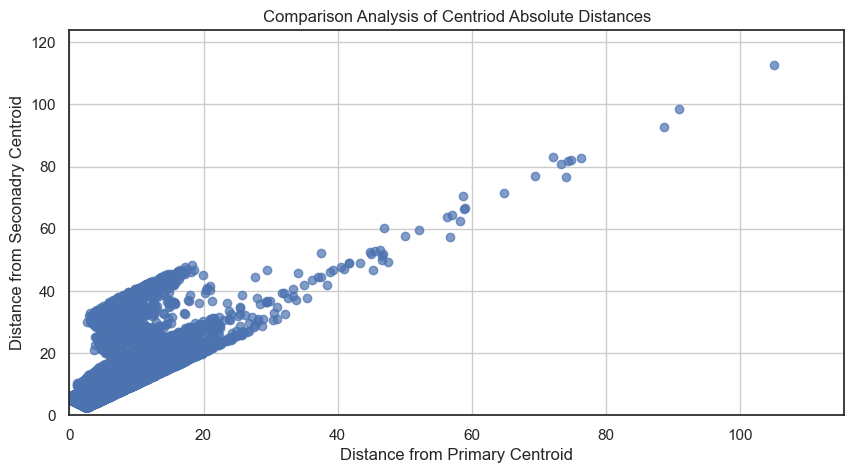

Run Time: 0.8081, Silhouette Score: 0.5808
Run Time: 0.7457, Silhouette Score: 0.5945
Run Time: 0.8056, Silhouette Score: 0.5989
Run Time: 0.7746, Silhouette Score: 0.5914
Run Time: 0.7708, Silhouette Score: 0.5895
Run Time: 0.7728, Silhouette Score: 0.6065
Run Time: 0.7526, Silhouette Score: 0.5928
Run Time: 0.7629, Silhouette Score: 0.5829
Run Time: 0.7459, Silhouette Score: 0.5939
Run Time: 0.7092, Silhouette Score: 0.5867

Mean Silhouette Score: 0.5918, Standard Deviaiton: 0.0075, Run Time: 7.65
Standard Deviation is Greater than Threshold, Increase Sample Size by 25% and Try Again.
Run Time: 1.1355, Silhouette Score: 0.5895
Run Time: 1.1084, Silhouette Score: 0.5968
Run Time: 1.1194, Silhouette Score: 0.5906
Run Time: 1.1244, Silhouette Score: 0.5934
Run Time: 1.0798, Silhouette Score: 0.5861
Run Time: 1.1422, Silhouette Score: 0.5853
Run Time: 1.2272, Silhouette Score: 0.5941
Run Time: 1.1668, Silhouette Score: 0.5958
Run Time: 1.1111, Silhouette Score: 0.5913
Run Time: 1.1161, S

,Feature,ANOVA_F,ANOVA_p,Kruskal_H,Kruskal_p,Eta_sq,Omega_sq
0,AVG_3M_OTHER_DEPOSIT,165172.402575,0.000000e+00,143288.860251,0.0,0.875432,0.875426
1,AVG_6M_OTHER_DEPOSIT,163789.285760,0.000000e+00,142549.977993,0.0,0.874512,0.874506
2,OTHER_DEPOSIT,159434.900877,0.000000e+00,142528.776126,0.0,0.871525,0.871519
3,AVG_12M_OTHER_DEPOSIT,153845.422383,0.000000e+00,140209.685848,0.0,0.867476,0.867470
4,AVG_DF_OTHER_DEPOSIT,141859.467478,0.000000e+00,137460.453702,0.0,0.857871,0.857864
5,CHG_DF_MORTGAGE_BALANCE,133156.649560,0.000000e+00,17248.330457,0.0,0.849975,0.849968
6,AVG_12M_PAYROLL_DEPOSIT,127684.466992,0.000000e+00,132893.063584,0.0,0.844545,0.844537
7,AVG_6M_PAYROLL_DEPOSIT,124940.886395,0.000000e+00,134842.146974,0.0,0.841672,0.841664
8,AVG_DF_PAYROLL_DEPOSIT,120869.867704,0.000000e+00,130663.671250,0.0,0.837207,0.837199
9,AVG_3M_PAYROLL_DEPOSIT,118636.645975,0.000000e+00,135305.632207,0.0,0.834649,0.834641


In [13]:
scatter_from_dataframe(final_df,
                       title="Comparison Analysis of Centriod Absolute Distances",
                       x_col='DISTANCE_PRIM_CENTROID',
                       y_col='MARGIN_DISTANCE',
                       x_label='Distance from Primary Centroid',
                       y_label='Margin Distance')

scatter_from_dataframe(final_df,
                       title="Comparison Analysis of Centriod Absolute Distances",
                       x_col='DISTANCE_PRIM_CENTROID',
                       y_col='DISTANCE_SECOND_CENTROID',
                       x_label='Distance from Primary Centroid',
                       y_label='Distance from Seconadry Centroid')

silhoutte = iteratively_test_sampled_model_performance(
    model_testing_function=sample_score_silhouette,
    df=Xt_dense,
    label=labels)

db = davies_bouldin_score(Xt_dense, labels)
ch = calinski_harabasz_score(Xt_dense, labels)

importance_df = feature_importance_by_clusters(scaled,labels)
display(importance_df)

###########################################################################################################################

### Development

In [ ]:
Eta_sq - Proportion of total variance explained by clustering” for that feature.



### Modellilng Process. 
1. Create Model, Baseline Heavy.
2. Add Momentum as secondary lens


### Explanation
1. Dimensions
    1. State
    2. Baseline
    3. Volatility
    4. Momentum
2. Implementations
3. Parameters


In [ ]:

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled)
pd.DataFrame(np.round(pca.explained_variance_ratio_,3))


In [ ]:
plot_top_features(importance_df)

## Model Pipeline

In [ ]:
# Run Model, include Binary Variable HAS MORTGAGE, and without. How does Model Perform Differently.

In [ ]:
#### Clustering: Given a set of Behavioural Metrics, it partitions into groups where average behaviour is similiar.

#### Questions I need to Answer.
- What Behaviours do I want to be sensitive to
- What Behaviours influence, and the scale of that influence
- What does this tell us, or not tell us?


#### Process for Effective Clustering


##### Need to Follow Entire ML Project Pipeline, so there are things that should already be completed and Available.


#he ANOVA F‑statistic across clusters.
#It’s the ratio of between‑cluster variance to within‑cluster variance (after normalizing by degrees of freedom). Larger F means the feature’s average value differs strongly across clusters relative to its variability inside clusters.

In [ ]:
# Need to Create Explicit Spread Sheet / Process for Management.
# Owner, Steward, Due Date, >>>>




Does Cluster Seperation Improve or Degrade (Silhouette, Centroid Seperation)
Does Cluster Stability Improve or Degrade (seed sensitivity, assignment churn)
Do profiles become Clearer or Muddier (Can I still give them viable names).


# 6. Post Implementation 




### Goal of Clustering

- Create a Grouping of 8 - 20 Member Behavioural Definitions based on Behavioural Engagement to understand how members are engaged
- Understand and Explain how the composition of these groups is mathematically influenced
- Understand which represents the best composition (Define "Best")
- Understand how these groups are comprised based on Demograhic
- Understand how these groups are changing over time
- Understand how we can change these groups overtime



### Mathematically
#### Need to understand impact of Outliers
#### Need to undertstand Impact of Binary
#### Need to include Impact of Structure Variables

### Mathematical Explanations for Clusters

1. Pairwise centroid distances (Euclidean): separation between clusters.
2. Silhouette score (global & per-sample): cohesion vs separation.
3. Davies–Bouldin (DB) index: average similarity of each cluster with its most similar cluster (lower is better).
4. Calinski–Harabasz (CH) index: ratio of between-cluster dispersion to within-cluster dispersion (higher is better).
5. Margin analysis: your MARGIN_DISTANCE is great for assignment confidence.

In [ ]:
db

In [ ]:
ch

In [ ]:




# DB and CH


print(f"Silhouette: {sil_global:.3f} | Davies-Bouldin: {db:.3f} | Calinski-Harabasz: {ch:.1f}")
centroid_dists_df


In [ ]:
# Kmeans is not PROBABLISTIC

In [ ]:
# wtf?
model.inertia_

In [ ]:
# Distance to Each Centroid
model.transform(X_t)

In [ ]:
# Place of Each Centroid.
model.cluster_centers_

In [ ]:
# Create a 2 Axis View. Determine what the interpration means on Scale and how it can go into selection and Change
# What are other metrics which can be calculated in addition to silhouette.
# 

In [ ]:
spread

In [ ]:
profiles.filter(like='mean').apply(lambda x:x.max()-x.min())

In [ ]:
current_df.pivot_table(index='CLASSIFICATION',columns='CENTROID',values='STATUS',aggfunc='count')

In [ ]:
# Clustering - Small Number of Stable, Interpretable, Member Archetypes, that summarize global behavior and can be reused across 
# Analysis and ML.

# Stability over Uniqueness.
# Interpretability over novelty
# Repeatability over Perfection.

In [ ]:
# Prepare Dataset
# Cluster 1 = 3M DEPOSIT_BALANCE, 3M LOAN_BALANCE, 3M TRANSACTION MEAN, 3M TRANSACTION VOLUME, Growth Rates ? , Product Number.
# Cluster 2 = 

# Member Features - 

# PCA Version. Straight Version.


In [ ]:
# Income
# City
# Home Owner
# Kids 
# 

# Not Behavior Metrics _____ Metrics.

cluster_variables = ['DEPOSIT_BALANCE','MORTGAGE_BALANCE','BILL_PAY_DEBIT','POS_TXN_DEBIT','PAYROLL_DEPOSIT','OTHER_DEPOSIT']
#  
# Drop and Include Closed.
# Including members with Material 0 (new Members with no History, might not be good)
# Cluster Stability Overtime. 



In [ ]:
final_df.groupby(['LABEL']).mean().T